In [124]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import os

# Importing country data from CSV to dbo.Country table

In [125]:
#Set current working directory
os.chdir('C:\Msc Data Analytics\Database and Analytics program\DAP_PRJ\Project files\Source_Files')

In [126]:
df_country=pd.read_csv("wikipedia-iso-country-codes.csv",encoding = 'utf8',keep_default_na=False,na_values=['_'])

In [127]:
df_country.rename(columns = {'English short name lower case':'Country_Name', 'Alpha-2 code':'Country_Code_2D','Alpha-3 code':'Country_Code_3D','Numeric code':'Country_Id','Numeric code':'Country_Id','ISO 3166-2':'ISO_Code'}, inplace = True)

In [128]:
df_long_lat=pd.read_csv("country_lat.csv",encoding = 'utf8',keep_default_na=False,na_values=['_'])

In [129]:
#df_country=df_country.reindex(columns=['Country_Name','Country_Code_2D','Country_Code_3D','Country_Id','ISO_Code','country','Latitude','Longitude'])

In [130]:
#Adding 'Country_Code','Country_Id' by using left outer join with df_country
df_country_full = pd.merge(df_country, df_long_lat[['country','latitude','longitude']],how='left', left_on='Country_Code_2D',right_on='country')

In [131]:
#df_country_full=df_country_full.drop(columns=['country'])

In [132]:
#df_country_full=df_country_full.reset_index(drop=True, inplace=True)

In [133]:
df_country_full.head()

Country_Name Country_Code_2D Country_Code_3D  Country_Id       ISO_Code  \
0   Aland Islands              AX             ALA         248  ISO 3166-2:AX   
1     Afghanistan              AF             AFG           4  ISO 3166-2:AF   
2         Albania              AL             ALB           8  ISO 3166-2:AL   
3         Algeria              DZ             DZA          12  ISO 3166-2:DZ   
4  American Samoa              AS             ASM          16  ISO 3166-2:AS   

  country   latitude   longitude  
0      AX  60.178525   19.915610  
1      AF  33.939110   67.709953  
2      AL  41.153332   20.168331  
3      DZ  28.033886    1.659626  
4      AS -14.270972 -170.132217

# Web Scraping risk data from the wiki page using BeautifulSoup

In [134]:
# Making a GET request
r = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_natural_disaster_risk')
print(r)

<Response [200]>


In [135]:
#Web scraping using BeautifulSoup

soup = BeautifulSoup(r.content, 'html.parser')

#s = soup.find('table', class_= 'wikitable sortable jquery-tablesorter')
#print(s)
header=[]
content = soup.find('tr')

for string in content.strings:
    #print(string)
    lst_not_in=['\n','[2]','[3]','[4]','[5]','[6]']
    if (string not in lst_not_in):
        string=string.replace('\n','')
        header.append(string)
 
print(header)

text=soup.find_all('td')

inner_list = []

for i in range(len(text)):
    val_ = text[i].get_text(strip=True)
    val_=val_.replace('\n','')
    inner_list.append(val_)
    
new_list = []

for i in range(0, len(inner_list), 6):
    new_list.append(inner_list[i:i+6])

['Rank', 'Country', '2016', '2013', '2012', '2011']


# MongoDB connectivity

In [136]:
import pymongo as pym
import pandas as pd
from pymongo import MongoClient

In [137]:
from pymongo import MongoClient
#connect on the default host and port.
client = MongoClient(host="localhost", port=27017)

In [138]:
dblist = client.list_database_names()

print(dblist)

['Natural_Disaster', 'US_Disaster', 'admin', 'config', 'local', 'test_database']


In [139]:
#Function to load data from web to MongoDB
def mongoimport(soup, db_name, coll_name,db_url='localhost', db_port=27017):
    data_dict={}
    db = client[db_name]
    coll = db[coll_name]
    data_dict["data"] = soup
    coll.insert_one(data_dict)

In [140]:
#Defining DB name and Collection name
database_name='Natural_Disaster'
collection_name='Risk_Rate'

In [141]:
#Loading data from web to MongoDB
mongoimport(new_list, database_name, collection_name)

In [142]:
from pandas import DataFrame
def retrieve_data(database_name,collection_name):
    #client = MongoClient('localhost', 27017,username='dap',password='dap')
    # Database Name
    db = client[database_name]
    # Collection Name
    col = db[collection_name]
    x = col.find()
    return x

In [143]:
#retriving data from MongoDB
data=retrieve_data(database_name,collection_name)

In [144]:
list_cur = list(data)
#print(list_cur)
test=list_cur[0].get("data")
# df = DataFrame()
df_risk = pd.DataFrame(test)

In [145]:
df_risk

0  \
0                                                    1   
1                                                    2   
2                                                    3   
3                                                    4   
4                                                    5   
..                                                 ...   
167                                                168   
168                                                169   
169                                                170   
170                                                171   
171  Life expectancyAfricaAsiaEuropeSouth AmericaWo...   

                                                     1  \
0                                                Qatar   
1                                                Malta   
2                                         Saudi Arabia   
3                                             Barbados   
4                                              Grenada   
..                                                 ...   
167                                          Guatemala   
168                                        Philippines   
169                                              Tonga   
170                                            Vanuatu   
171  Net take-home payLong-term unemployment rateHo...   

                                                     2  \
0                                                0.08%   
1                                                0.60%   
2                                                1.14%   
3                                                1.32%   
4                                                1.42%   
..                                                 ...   
167                                             19.88%   
168                                             26.70%   
169                                             29.33%   
170                                             36.28%   
171  Greenhouse gas emissions per capitaDashboard o...   

                                                     3  \
0                                                0.11%   
1                                                0.61%   
2                                                1.32%   
3                                                1.16%   
4                                                1.44%   
..                                                 ...   
167                                             20.88%   
168                                             27.52%   
169                                             28.23%   
170                                             36.43%   
171  Antidepressant consumptionCancer rateChild Dev...   

                                                     4  \
0                                                0.10%   
1                                                0.61%   
2                                                1.31%   
3                                                1.15%   
4                                                1.44%   
..                                                 ...   
167                                             20.75%   
168                                             27.98%   
169                                             28.62%   
170                                             36.31%   
171  Corruption Perceptions IndexDemocracy IndexDis...   

                                                  5  
0                                             0.02%  
1                                             0.72%  
2                                             1.26%  
3                                             2.44%  
4                                             2.29%  
..                                              ...  
167                                          20.88%  
168                                          24.32%  
169                                          29.08%  
170                         

In [146]:
# text[1].get_text(strip=True)

In [147]:
# import unicodedata
# unicodedata.normalize("NFKD",(text[1].get_text()))

# Data Preprocessing

In [148]:
#Removing row number 171 as its not relevent
df_risk = df_risk[:-1]

In [149]:
#df_risk

In [150]:
#Assigning header to the data
df_risk.columns=header

In [151]:
#df_risk

In [152]:
#Drop Rank attribute
df_risk.drop(['Rank'],axis=1, inplace=True)

C:\Users\Sasikumar Jayapal\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
#Removing % from table data
df_risk['2016'] = df_risk['2016'].str.replace(r'%', '').astype(float)
df_risk['2013'] = df_risk['2013'].str.replace(r'%', '').astype(float)
df_risk['2012'] = df_risk['2012'].str.replace(r'%', '').astype(float)
df_risk['2011'] = df_risk['2011'].str.replace(r'%', '').astype(float)

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/1101165386.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/1101165386.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/1101165386.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [154]:
#df_risk

In [155]:
#Calculating average risk score
df_risk['risk_score']=((df_risk['2016']+df_risk['2013']+df_risk['2012']+df_risk['2011'])/4).round(2)

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/570828514.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
#df_risk

In [157]:
#Defining risk_category from the risk score
df_risk['risk_category'] = np.select(
    [
        df_risk['risk_score'].between(0, 3.60, inclusive=True), 
        df_risk['risk_score'].between(3.60, 5.50, inclusive=True),
        df_risk['risk_score'].between(5.50, 7.60, inclusive=True),
        df_risk['risk_score'].between(7.60, 10.50, inclusive=True),
        df_risk['risk_score'].between(10.50, 100.00, inclusive=True),
    ], 
    [
        'Very Low Risk', 
        'Low Risk',
        'Medium Risk',
        'High Risk',
        'Very High Risk'
    ], 
    default='Unknown'
)

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3768405104.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3768405104.py:5: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3768405104.py:6: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3768405104.py:7: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3768405104.py:8: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3768405104.py:2: SettingWithCopyWarning:


A value is try

In [158]:
#df_risk

In [159]:
#risk.loc[risk['risk_category']=='Unknown']

In [160]:
df_risk['risk_category'].value_counts()

Medium Risk       43
Very Low Risk     36
Very High Risk    35
Low Risk          29
High Risk         28
Name: risk_category, dtype: int64

In [161]:
#df_country[df_country['Country_Name'].duplicated(keep=False)]

In [162]:
#df_country_full = df_country_full.reindex(columns=['Country_Name','Country_Code_2D','Country_Code_3D','Country_Id','ISO_Code','country','Latitude','Longitude'], fill_value=df_long_lat[['latitude','longitude']])

In [163]:
df_country_full

Country_Name Country_Code_2D Country_Code_3D  Country_Id  \
0        Aland Islands              AX             ALA         248   
1          Afghanistan              AF             AFG           4   
2              Albania              AL             ALB           8   
3              Algeria              DZ             DZA          12   
4       American Samoa              AS             ASM          16   
..                 ...             ...             ...         ...   
241  Wallis and Futuna              WF             WLF         876   
242     Western Sahara              EH             ESH         732   
243              Yemen              YE             YEM         887   
244             Zambia              ZM             ZMB         894   
245           Zimbabwe              ZW             ZWE         716   

          ISO_Code country   latitude   longitude  
0    ISO 3166-2:AX      AX  60.178525   19.915610  
1    ISO 3166-2:AF      AF  33.939110   67.709953  
2    ISO 3166-2:AL      AL  41.153332   20.168331  
3    ISO 3166-2:DZ      DZ  28.033886    1.659626  
4    ISO 3166-2:AS      AS -14.270972 -170.132217  
..             ...     ...        ...         ...  
241  ISO 3166-2:WF      WF -13.768752 -177.156097  
242  ISO 3166-2:EH      EH  24.215527  -12.885834  
243  ISO 3166-2:YE      YE  15.552727   48.516388  
244  ISO 3166-2:ZM      ZM -13.133897   27.849332  
245  ISO 3166-2:ZW      ZW -19.015438   29.154857  

[246 rows x 8 columns]

In [164]:
#df_risk

In [165]:
#Adding 'Country_Code','Country_Id' by using left outer join with df_country
df_risk_azuredb = pd.merge(df_risk, df_country_full[['Country_Name','Country_Code_3D','Country_Id','latitude','longitude']],how='left', left_on='Country',right_on='Country_Name').reset_index()

In [166]:
df_risk_azuredb

index       Country   2016   2013   2012   2011  risk_score  \
0        0         Qatar   0.08   0.11   0.10   0.02        0.08   
1        1         Malta   0.60   0.61   0.61   0.72        0.64   
2        2  Saudi Arabia   1.14   1.32   1.31   1.26        1.26   
3        3      Barbados   1.32   1.16   1.15   2.44        1.52   
4        4       Grenada   1.42   1.44   1.44   2.29        1.65   
..     ...           ...    ...    ...    ...    ...         ...   
166    166    Bangladesh  19.17  19.81  20.22  17.45       19.16   
167    167     Guatemala  19.88  20.88  20.75  20.88       20.60   
168    168   Philippines  26.70  27.52  27.98  24.32       26.63   
169    169         Tonga  29.33  28.23  28.62  29.08       28.82   
170    170       Vanuatu  36.28  36.43  36.31  32.00       35.26   

      risk_category  Country_Name Country_Code_3D  Country_Id   latitude  \
0     Very Low Risk         Qatar             QAT       634.0  25.354826   
1     Very Low Risk         Malta             MLT       470.0  35.937496   
2     Very Low Risk  Saudi Arabia             SAU       682.0  23.885942   
3     Very Low Risk      Barbados             BRB        52.0  13.193887   
4     Very Low Risk       Grenada             GRD       308.0  12.262776   
..              ...           ...             ...         ...        ...   
166  Very High Risk    Bangladesh             BGD        50.0  23.684994   
167  Very High Risk     Guatemala             GTM       320.0  15.783471   
168  Very High Risk   Philippines             PHL       608.0  12.879721   
169  Very High Risk         Tonga             TON       776.0 -21.178986   
170  Very High Risk       Vanuatu             VUT       548.0 -15.376706   

      longitude  
0     51.183884  
1     14.375416  
2     45.079162  
3    -59.543198  
4    -61.604171  
..          ...  
166   90.356331  
167  -90.230759  
168  121.774017  
169 -175.198242  
170  166.959158  

[171 rows x 13 columns]

In [167]:
#Cleaning 'Country_Name' and 'Country_Id'
df_risk_azuredb.drop(columns=['Country_Name'],inplace=True)
df_risk_azuredb['Country_Id'] = df_risk_azuredb['Country_Id'].fillna(0)
df_risk_azuredb['Country_Id']=df_risk_azuredb['Country_Id'].astype(int)

In [168]:
#Changing the column position
my_column = df_risk_azuredb.pop('Country_Id')
df_risk_azuredb.insert(0, my_column.name, my_column)
my_column = df_risk_azuredb.pop('Country_Code_3D')
df_risk_azuredb.insert(1, my_column.name, my_column)

In [169]:
#Renaming the existing column
df_risk_azuredb=df_risk_azuredb.rename(columns={'2016':'risk_score_2016','2013':'risk_score_2013','2012':'risk_score_2012','2011':'risk_score_2011','Country_Code_3D':'Country_Code'})

In [170]:
df_risk_azuredb = df_risk_azuredb.fillna(value=0)

In [171]:
#Cleaning 'Country' attribute as per ISO standard
df_risk_azuredb['Country'] = np.select(
    [
        df_risk_azuredb['Country'].isin(['Libya']),
        df_risk_azuredb['Country'].isin(['Syria']),
        df_risk_azuredb['Country'].isin(['Brunei']),
        df_risk_azuredb['Country'].isin(['Israel/Palestine'])
    ], 
    [
        'Libyan Arab Jamahiriya',
        'Syrian Arab Republic',
        'Brunei Darussalam',
        'Israel'
    ],
    default=df_risk_azuredb['Country'].str.strip()
)

In [172]:
df_risk_azuredb

Country_Id Country_Code  index       Country  risk_score_2016  \
0           634          QAT      0         Qatar             0.08   
1           470          MLT      1         Malta             0.60   
2           682          SAU      2  Saudi Arabia             1.14   
3            52          BRB      3      Barbados             1.32   
4           308          GRD      4       Grenada             1.42   
..          ...          ...    ...           ...              ...   
166          50          BGD    166    Bangladesh            19.17   
167         320          GTM    167     Guatemala            19.88   
168         608          PHL    168   Philippines            26.70   
169         776          TON    169         Tonga            29.33   
170         548          VUT    170       Vanuatu            36.28   

     risk_score_2013  risk_score_2012  risk_score_2011  risk_score  \
0               0.11             0.10             0.02        0.08   
1               0.61             0.61             0.72        0.64   
2               1.32             1.31             1.26        1.26   
3               1.16             1.15             2.44        1.52   
4               1.44             1.44             2.29        1.65   
..               ...              ...              ...         ...   
166            19.81            20.22            17.45       19.16   
167            20.88            20.75            20.88       20.60   
168            27.52            27.98            24.32       26.63   
169            28.23            28.62            29.08       28.82   
170            36.43            36.31            32.00       35.26   

      risk_category   latitude   longitude  
0     Very Low Risk  25.354826   51.183884  
1     Very Low Risk  35.937496   14.375416  
2     Very Low Risk  23.885942   45.079162  
3     Very Low Risk  13.193887  -59.543198  
4     Very Low Risk  12.262776  -61.604171  
..              ...        ...         ...  
166  Very High Risk  23.684994   90.356331  
167  Very High Risk  15.783471  -90.230759  
168  Very High Risk  12.879721  121.774017  
169  Very High Risk -21.178986 -175.198242  
170  Very High Risk -15.376706  166.959158  

[171 rows x 12 columns]

# Kmeans clustering algorithm

In [173]:
from sklearn.cluster import KMeans
df_kmeans=df_risk_azuredb[['risk_score_2016','risk_score_2013','risk_score_2012','risk_score_2011','risk_category']]
df_kmeans_x=df_risk_azuredb[['risk_score_2016','risk_score_2013','risk_score_2012','risk_score_2011']]
df_kmeans_y=df_risk_azuredb['risk_category']

C:\Users\Sasikumar Jayapal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



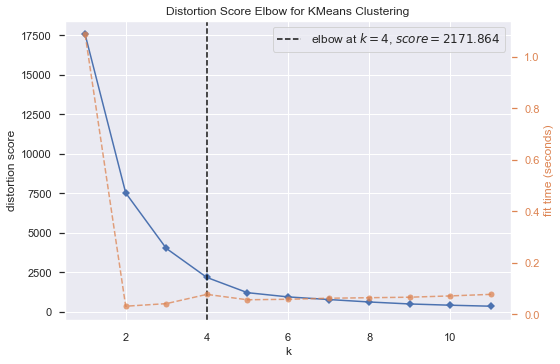

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_kmeans_x)
visualizer.show()

In [175]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(df_kmeans_x)

In [176]:
df_kmeans=pd.concat([df_kmeans.reset_index(drop=True), pd.DataFrame(kmeans.labels_,columns=['Kmeans_Label'])],axis=1)

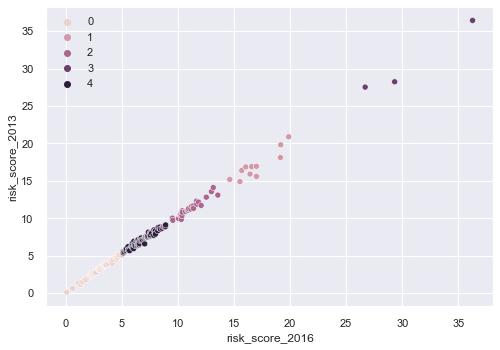

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_kmeans_x, x="risk_score_2016", y="risk_score_2013", hue=kmeans.labels_)
plt.show()

In [178]:
#df_kmeans.loc[df_kmeans['risk_category']=='Very High Risk']

# Web Scraping disaster death rate data from wiki using BeautifulSoup

In [179]:
death_toll = requests.get('https://en.wikipedia.org/wiki/List_of_natural_disasters_by_death_toll')
#print(death_toll)

In [180]:
soup = BeautifulSoup(death_toll.content, 'html.parser')

#print(soup.prettify())

In [181]:
#Web scraping 20th century data
disaster_20th_century = soup.find("table", attrs={"class": "wikitable sortable mw-collapsible"})
disaster_20th_century_data = disaster_20th_century.tbody.find_all("tr")
headings=[]

for td in disaster_20th_century_data[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings.append(td.text.replace('\n', ' ').strip())
    #print(td.text.replace('\n', ' ').strip())
print(headings)

# Get all the rows of table
table_data = []
data={}
for tr in disaster_20th_century.tbody.find_all("tr"): # find all tr's from table's tbody
    t_row ={}
    for td, th in zip(tr.find_all("td"), headings): 
        t_row[th] = td.text.replace('\n', '').strip()
    #print(t_row)
    table_data.append(t_row)

['Year', 'Death toll', 'Event', 'Location', 'Type', 'Date']


In [182]:
#Web scraping 21st century data
disaster_21th_century = soup.findAll("table", attrs={"class": "wikitable sortable mw-collapsible"})
disaster_21th_century_data = disaster_21th_century[1].tbody.find_all("tr")
headings=[]

for td in disaster_21th_century_data[0].find_all("th"):
    # remove any newlines and extra spaces from left and right
    headings.append(td.text.replace('\n', ' ').strip())
    #print(td.text.replace('\n', ' ').strip())

print(headings)

# Get all the rows of table
table_data_1 = []
data_1={}
for tr in disaster_21th_century[1].tbody.find_all("tr"): # find all tr's from table's tbody
    t_row ={}

    for td, th in zip(tr.find_all("td"), headings): 
        t_row[th] = td.text.replace('\n', '').strip()
    #print(t_row)
    table_data_1.append(t_row)
#data[headings] = table_data
#print(table_data)

['Year', 'Death toll', 'Event', 'Location', 'Type', 'Date']


In [183]:
#meging 20th century and 21st century data
table_data.extend(table_data_1)

# MongoDB connectivity for death toll data

In [184]:
#Loading data from web to MongoDB
collection_name='Disaster_Casualty_byCountry'
mongoimport(table_data, database_name, collection_name)

In [185]:
#retriving data from MongoDB
death_toll_data=retrieve_data(database_name,collection_name)

In [186]:
#Creating data frome from the list
list_cur = list(death_toll_data)
#print(list_cur)
test=list_cur[0].get("data")
# df = DataFrame()
df_death_toll = pd.DataFrame(test)

In [187]:
df_death_toll = df_death_toll.iloc[1: , :]

In [188]:
df_death_toll

Year       Death toll                                 Event  \
1    1920  200,000–273,400               1920 Haiyuan earthquake   
2    1921              215     September 1921 San Antonio floods   
3    1922  50,000–100,000+                   1922 Swatow typhoon   
4    1923          142,800           1923 Great Kantō earthquake   
5    1924            1,000                     1924 India floods   
..    ...              ...                                   ...   
100  2018            4,340  2018 Sulawesi earthquake and tsunami   
101  2019           1,600+                    2019 Indian floods   
102  2020        1,922[13]                    2020 Indian floods   
103  2021            2,248                 2021 Haiti earthquake   
104  2022              450             2022 KwaZulu-Natal floods   

               Location                 Type               Date  
1       China, Mongolia           Earthquake        December 16  
2         United States                Flood    September 7 –11  
3    Philippines, China     Tropical cyclone  July 27 –August 3  
4                 Japan           Earthquake        September 1  
5                 India                Flood               July  
..                  ...                  ...                ...  
100           Indonesia  Earthquake, Tsunami       September 28  
101        India, Nepal                Flood     June – October  
102   India, Bangladesh     June – September                NaN  
103               Haiti           Earthquake          August 14  
104        South Africa                Flood    April 8-ongoing  

[104 rows x 6 columns]

# Data preprocessing of death toll data

In [189]:
#Preparing data for the first normal form
df_death_toll=df_death_toll.assign(Location=df_death_toll['Location'].str.split(',')).explode('Location')
df_death_toll['Location']=df_death_toll['Location'].str.strip()
#df.assign(var1=df['var1'].str.split(',')).explode('var1')

In [190]:
df_death_toll.drop(columns=['Date'],inplace=True)

In [191]:
df_death_toll['New_Event'] = df_death_toll['Event'].str.split(' ').str[-1]
df_death_toll

Year       Death toll                              Event       Location  \
1    1920  200,000–273,400            1920 Haiyuan earthquake          China   
1    1920  200,000–273,400            1920 Haiyuan earthquake       Mongolia   
2    1921              215  September 1921 San Antonio floods  United States   
3    1922  50,000–100,000+                1922 Swatow typhoon    Philippines   
3    1922  50,000–100,000+                1922 Swatow typhoon          China   
..    ...              ...                                ...            ...   
101  2019           1,600+                 2019 Indian floods          Nepal   
102  2020        1,922[13]                 2020 Indian floods          India   
102  2020        1,922[13]                 2020 Indian floods     Bangladesh   
103  2021            2,248              2021 Haiti earthquake          Haiti   
104  2022              450          2022 KwaZulu-Natal floods   South Africa   

                 Type   New_Event  
1          Earthquake  earthquake  
1          Earthquake  earthquake  
2               Flood      floods  
3    Tropical cyclone     typhoon  
3    Tropical cyclone     typhoon  
..                ...         ...  
101             Flood      floods  
102  June – September      floods  
102  June – September      floods  
103        Earthquake  earthquake  
104             Flood      floods  

[156 rows x 6 columns]

In [192]:
#Removing white spaces
df_death_toll['Type'].str.strip()
df_death_toll['Location'].str.strip()

1              China
1           Mongolia
2      United States
3        Philippines
3              China
           ...      
101            Nepal
102            India
102       Bangladesh
103            Haiti
104     South Africa
Name: Location, Length: 156, dtype: object

In [193]:
#df_death_toll.loc[df3['Year']=='1961']

In [194]:
#df_death_toll[~df_death_toll['Type'].isin(['Earthquake','Flood','Tropical cyclone','Earthquake, Tsunami','Heat wave','Tropical cyclone, Flood','Limnic eruption','Volcanic eruption','Landslide'])]

In [195]:
#Cleansing on Type attribute
df_death_toll['Type'] = np.select(
    [
        df_death_toll['New_Event'].isin(['earthquake']),
        df_death_toll['New_Event'].isin(['floods','flood']),
        df_death_toll['New_Event'].isin(['Wave','wave']),
        df_death_toll['New_Event'].isin(['Haiyan','Nargis','Fifi–Orlene','cyclones','(1975)','(1964)','(1956)','Vera','Ten','Winnie'])
    ], 
    [
        'Earthquake',
        'Flood',
        'Heat wave',
        'Tropical cyclone'
    ],
    default=df_death_toll['Type']
)

In [196]:
#Cleansing on Location attribute
df_death_toll['Location'] = np.select(
    [
        df_death_toll['Location'].isin(['East Pakistan ( now Bangladesh )','East Pakistan ( now Bangladesh )','East Pakistan ( now Bangladesh)','East Pakistan ( now Bangladesh )']),
        df_death_toll['Location'].isin(['North Vietnam']),
        df_death_toll['Location'].isin(['Lesser Antilles']),
        df_death_toll['Location'].isin(['Luxembourg'])
    ], 
    [
        'Bangladesh',
        'Vietnam',
        'Netherlands Antilles',
        'Luxembourg'
    ],
    default=df_death_toll['Location'].str.strip()
)

In [197]:
df_death_toll=df_death_toll[df_death_toll.Location!='']
df_death_toll=df_death_toll[df_death_toll.Year!='1961']
df_death_toll=df_death_toll.dropna()

In [198]:
df_death_toll['Location'].isnull().sum()

0

In [199]:
df_death_toll=df_death_toll.assign(Type=df_death_toll['Type'].str.split(',')).explode('Type')
df_death_toll['Type'].str.strip()

1            Earthquake
1            Earthquake
2                 Flood
3      Tropical cyclone
3      Tropical cyclone
             ...       
101               Flood
102               Flood
102               Flood
103          Earthquake
104               Flood
Name: Type, Length: 162, dtype: object

In [200]:
#Cleansing death toll attribute to accomodate first normal form
df_death_toll['new Death toll'] = df_death_toll['Death toll'].str.split('–').str[-1]
df_death_toll['new Death toll'] = df_death_toll['new Death toll'].str.split('[').str[0]
df_death_toll['new Death toll'] = df_death_toll['new Death toll'].str.replace(r'+','')
df_death_toll['new Death toll'] = df_death_toll['new Death toll'].str.replace(r',','').astype(int)
df_death_toll.drop(columns=['New_Event','Death toll'],inplace=True)
df_death_toll=df_death_toll.rename(columns={'new Death toll':'Death toll'})
#df_death_toll

C:\Users\SASIKU~1\AppData\Local\Temp/ipykernel_15020/3321215642.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [201]:
df_death_toll.isnull().sum()

Year          0
Event         0
Location      0
Type          0
Death toll    0
dtype: int64

In [202]:
#Adding 'Country_Code','Country_Id' by using left outer join with df_country
df_death_azure = pd.merge(df_death_toll, df_country_full[['Country_Name','Country_Code_3D','Country_Id','latitude','longitude']],how='left', left_on='Location',right_on='Country_Name')

In [203]:
df_death_azure=df_death_azure.dropna()

In [204]:
#Changing position of column order
my_column = df_death_azure.pop('Country_Id').astype(int)
df_death_azure.insert(0, my_column.name, my_column)
my_column = df_death_azure.pop('Country_Code_3D')
df_death_azure.insert(1, my_column.name, my_column)
my_column = df_death_azure.pop('Country_Name')
df_death_azure.insert(1, my_column.name, my_column)
my_column = df_death_azure.pop('Year')
df_death_azure.insert(0, my_column.name, my_column)
df_death_azure=df_death_azure.drop(columns=['Location'])
df_death_azure=df_death_azure.rename(columns={'Country_Code_3D':'Country_Code','Death toll':'Death_Toll'})

In [205]:
df_death_azure

Year  Country_Id   Country_Name Country_Code  \
0    1920         156          China          CHN   
1    1920         496       Mongolia          MNG   
2    1921         840  United States          USA   
3    1922         608    Philippines          PHL   
4    1922         156          China          CHN   
..    ...         ...            ...          ...   
157  2019         524          Nepal          NPL   
158  2020         356          India          IND   
159  2020          50     Bangladesh          BGD   
160  2021         332          Haiti          HTI   
161  2022         710   South Africa          ZAF   

                                 Event              Type  Death_Toll  \
0              1920 Haiyuan earthquake        Earthquake      273400   
1              1920 Haiyuan earthquake        Earthquake      273400   
2    September 1921 San Antonio floods             Flood         215   
3                  1922 Swatow typhoon  Tropical cyclone      100000   
4                  1922 Swatow typhoon  Tropical cyclone      100000   
..                                 ...               ...         ...   
157                 2019 Indian floods             Flood        1600   
158                 2020 Indian floods             Flood        1922   
159                 2020 Indian floods             Flood        1922   
160              2021 Haiti earthquake        Earthquake        2248   
161          2022 KwaZulu-Natal floods             Flood         450   

      latitude   longitude  
0    35.861660  104.195397  
1    46.862496  103.846656  
2    37.090240  -95.712891  
3    12.879721  121.774017  
4    35.861660  104.195397  
..         ...         ...  
157  28.394857   84.124008  
158  20.593684   78.962880  
159  23.684994   90.356331  
160  18.971187  -72.285215  
161 -30.559482   22.937506  

[158 rows x 9 columns]

In [206]:
#df_death.to_csv("C:\\Msc Data Analytics\\Database and Analytics program\\Dataset\\Death_tolls.csv")

# Azure sql connectivity and data loading using pyodbc

In [207]:
# #defining connection parameters
# import pyodbc 
# server = 'msc-dat-analytics.database.windows.net' 
# database = 'MscDAT' 
# username = 'dap' 
# password = 'India-data-analytics' 
# conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)


In [208]:
#defining connection parameters
import pyodbc 

conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-FMSOI4VL;"
                      "Database=MscDAP;"
                      "Trusted_Connection=yes;")


In [209]:
cursor = conn.cursor()

In [210]:
cursor.execute('''
IF OBJECT_ID('dbo.RISK_COUNTRY', 'U') IS NOT NULL 
  DROP TABLE dbo.RISK_COUNTRY; 
''')

In [211]:
cursor.execute('''
IF OBJECT_ID('dbo.Death_Toll_by_Disaster', 'U') IS NOT NULL 
  DROP TABLE dbo.Death_Toll_by_Disaster; 
''')

In [212]:
cursor.execute('''
IF OBJECT_ID('dbo.country', 'U') IS NOT NULL 
  DROP TABLE dbo.country; 
''')

In [213]:
cursor.execute('''
Create table dbo.country(
Country_Id int,
Country_Name varchar(50),
Country_Code_2D char(2),
Country_Code_3D char(3),
ISO_Code varchar(20),
Latitude float,
Longitude float
PRIMARY KEY (Country_Id));
''') 

In [214]:
for index, row in df_country_full.iterrows():
     cursor.execute("INSERT INTO dbo.country (Country_Id,Country_Name,Country_Code_3D,ISO_Code,Country_Code_2D,Latitude,Longitude) values(?,?,?,?,?,?,?)", row.Country_Id, row.Country_Name,row.Country_Code_3D,row.ISO_Code,row.Country_Code_2D,row.latitude,row.longitude)
conn.commit()

In [215]:
#Creating risk country table
cursor.execute('''
CREATE TABLE dbo.RISK_COUNTRY(
RISK_ID INT IDENTITY(101,1),
Country_Id INT,
Country_Code char(3), 
Country varchar(30),
Latitude float,
Longitude float,
risk_score_2016 float,
risk_score_2013 float,
risk_score_2012 float,
risk_score_2011 float,
risk_category varchar(20),
PRIMARY KEY (RISK_ID)
--FOREIGN KEY (Country_Id) REFERENCES dbo.country(Country_Id)
);
''') 

In [216]:
#Inserting rows from dataframe to dbo.RISK_COUNTRY table
for index, row in df_risk_azuredb.iterrows():
     cursor.execute("INSERT INTO dbo.RISK_COUNTRY (Country_Id,Country_Code,Country,risk_score_2016,risk_score_2013,risk_score_2012,risk_score_2011,risk_category,Latitude,Longitude)values(?,?,?,?,?,?,?,?,?,?)",row.Country_Id,row.Country_Code, row.Country,row.risk_score_2016,row.risk_score_2013,row.risk_score_2012,row.risk_score_2011,row.risk_category,row.latitude,row.longitude)
conn.commit()

In [217]:
#Updating rows with merge statement
cursor.execute('''
     with country_cte as
(select * from dbo.RISK_COUNTRY where country_Id=0)
MERGE country_cte AS TARGET
USING country AS SOURCE 
ON (TARGET.Country = SOURCE.Country_Name) 
--When records are matched, update the records if there is any change
WHEN MATCHED 
THEN UPDATE SET TARGET.Country_Id = SOURCE.Country_Id,
TARGET.Country_Code = SOURCE.Country_Code_3D;
''')
conn.commit()

In [218]:
#Creating foreign key reference
cursor.execute("ALTER TABLE dbo.RISK_COUNTRY ADD CONSTRAINT FK_RISK_COUNTRY FOREIGN KEY (Country_Id) REFERENCES dbo.country(Country_Id)")
conn.commit()

In [219]:
#Creating table dbo.Death_Toll_by_Disaster to load death toll data
cursor.execute('''
CREATE TABLE dbo.Death_Toll_by_Disaster
(
Event_ID int identity(1000,1),
Year int,
Country_Id int,
Country_Code char(3),
Country_Name varchar(30),
Latitude float,
Longitude float,
Event varchar(50),
Type varchar(20),
Death_Toll int,
Severity varchar(30),
PRIMARY KEY (Event_ID),
FOREIGN KEY (Country_Id) REFERENCES dbo.country(Country_Id)
);
''') 

In [220]:
#Inserting dataframe data into dbo.Death_Toll_by_Disaster table
for index, row in df_death_azure.iterrows():
    cursor.execute("INSERT INTO dbo.Death_Toll_by_Disaster(Year,Country_Id,Country_Code,Country_Name,Event,Type,Death_Toll,Latitude,Longitude) values(?,?,?,?,?,?,?,?,?)",row.Year,row.Country_Id,row.Country_Code, row.Country_Name,row.Event,row.Type,row.Death_Toll,row.latitude,row.longitude)
    conn.commit()

In [221]:
#Removing white spaces from the table.
cursor.execute("UPDATE Death_Toll_by_Disaster SET Type=TRIM(Type)")
conn.commit()

In [222]:
cursor.execute('''
MERGE dbo.Death_Toll_by_Disaster AS TARGET
USING dbo.RISK_COUNTRY AS SOURCE
ON (TARGET.Country_Id = SOURCE.Country_Id) 
WHEN MATCHED 
THEN UPDATE SET TARGET.Severity = SOURCE.risk_category;
''')
conn.commit()

In [223]:
risk_sql = "SELECT RISK_ID, Country_Id,Country_Code as 'Country Code',Country as 'Country Name',Latitude,Longitude,risk_score_2016,risk_score_2013,risk_score_2012,risk_score_2011,risk_category as 'Risk Category' FROM dbo.RISK_COUNTRY ;"
df_risk_sql = pd.read_sql(risk_sql, conn)
df_risk_sql.head()

RISK_ID  Country_Id Country Code  Country Name   Latitude  Longitude  \
0      101         634          QAT         Qatar  25.354826  51.183884   
1      102         470          MLT         Malta  35.937496  14.375416   
2      103         682          SAU  Saudi Arabia  23.885942  45.079162   
3      104          52          BRB      Barbados  13.193887 -59.543198   
4      105         308          GRD       Grenada  12.262776 -61.604171   

   risk_score_2016  risk_score_2013  risk_score_2012  risk_score_2011  \
0             0.08             0.11             0.10             0.02   
1             0.60             0.61             0.61             0.72   
2             1.14             1.32             1.31             1.26   
3             1.32             1.16             1.15             2.44   
4             1.42             1.44             1.44             2.29   

   Risk Category  
0  Very Low Risk  
1  Very Low Risk  
2  Very Low Risk  
3  Very Low Risk  
4  Very Low Risk

In [224]:
death_toll_sql = "SELECT Event_ID,Year,Country_Id,Country_Code as 'Country Code',Country_Name as 'Country Name',Latitude,Longitude,Event,Type as 'Risk Type',Death_Toll as 'Casuality Rate',Severity FROM dbo.Death_Toll_by_Disaster ;"
df_death_toll_sql = pd.read_sql(death_toll_sql, conn)
df_death_toll_sql.head()

Event_ID  Year  Country_Id Country Code   Country Name   Latitude  \
0      1000  1920         156          CHN          China  35.861660   
1      1001  1920         496          MNG       Mongolia  46.862496   
2      1002  1921         840          USA  United States  37.090240   
3      1003  1922         608          PHL    Philippines  12.879721   
4      1004  1922         156          CHN          China  35.861660   

    Longitude                              Event         Risk Type  \
0  104.195397            1920 Haiyuan earthquake        Earthquake   
1  103.846656            1920 Haiyuan earthquake        Earthquake   
2  -95.712891  September 1921 San Antonio floods             Flood   
3  121.774017                1922 Swatow typhoon  Tropical cyclone   
4  104.195397                1922 Swatow typhoon  Tropical cyclone   

   Casuality Rate        Severity  
0          273400     Medium Risk  
1          273400   Very Low Risk  
2             215        Low Risk  
3          100000  Very High Risk  
4          100000     Medium Risk

In [225]:
import plotly.express as px
#df_risk_sql_risk = df_risk_sql.query("Country == 'Canada'")
dfg=df_risk_sql.groupby('Risk Category').count().reset_index()
fig = px.bar(dfg, x='Risk Category', y='Country Name',title="No of countries by each risk category",color='Risk Category',
             barmode='stack')
fig.show()
#dfg.head()
#color='risk_category'

In [226]:
#fig =px.scatter_geo(df_risk_sql,lat='Latitude',lon='Longitude')
#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#df = px.data.gapminder().query("year == 2007")
#https://www.geeksforgeeks.org/plotly-express-scatter_geo-function-in-python/
  
plot = px.scatter_geo(df_risk_sql, locations="Country Code",
                      color = "Risk Category")
plot.show()
#fig.show()

In [227]:
fig = px.choropleth(df_risk_sql, locations="Country Code",
                    color="Risk Category",
                    hover_name="Country Name",
                    title = "Countries by Risk Types", color_continuous_scale=px.colors.sequential.PuRd)
 
 
fig["layout"].pop("updatemenus")
fig.show()

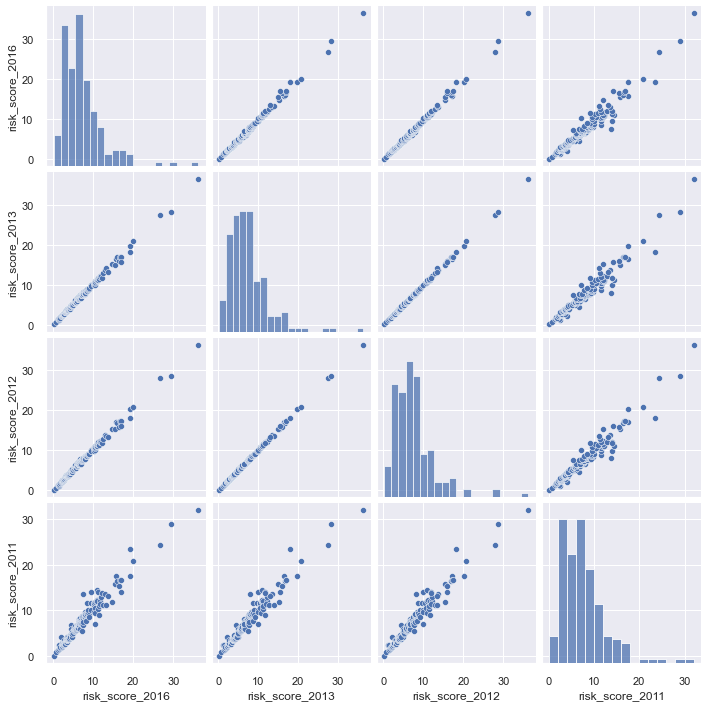

In [228]:
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df_risk_sql[["risk_score_2016", "risk_score_2013", "risk_score_2012", "risk_score_2011"]]
);

In [229]:
fig = px.pie(df_death_toll_sql, values=df_death_toll_sql['Casuality Rate'], names=df_death_toll_sql['Risk Type'], title="Percentage of the Casualty Rates by disaster event")
fig.show()

In [230]:
df_death_toll_China=df_death_toll_sql.loc[df_death_toll_sql['Country Name']=='China']
fig = px.pie(df_death_toll_China, values=df_death_toll_China['Casuality Rate'], names=df_death_toll_China['Risk Type'], title="Casualty rates of China by various disaster events")
fig.show()

In [231]:
df_death_toll_India=df_death_toll_sql.loc[df_death_toll_sql['Country Name']=='India']
fig = px.pie(df_death_toll_India, values=df_death_toll_India['Casuality Rate'], names=df_death_toll_India['Risk Type'], title="Casualty Rates in India by various disaster events")
fig.show()

In [232]:
fig = px.bar(df_death_toll_sql, x=df_death_toll_sql['Casuality Rate'], y=df_death_toll_sql['Risk Type'], color=df_death_toll_sql['Risk Type'], orientation='h')
fig.show()

In [233]:
fig = px.line(df_death_toll_sql, x='Year', y='Casuality Rate',color='Country Name',markers=True, title='Disaster trends across the glob from 1920 to 2020')
fig.show()

In [234]:
fig = px.line(df_death_toll_sql, x='Year', y='Casuality Rate',color='Risk Type',markers=True, title='Death rates over the period from 1920 to 2020')
fig.show()

In [235]:
import plotly.express as px
#df_risk_sql_risk = df_risk_sql.query("Country == 'Canada'")
dfg=df_death_toll_sql.groupby('Country Name').sum().reset_index()
fig = px.bar(dfg, x='Country Name', y='Casuality Rate',title="Death rates over the country",color='Country Name',
             barmode='stack')
fig.show()

In [236]:
dfg=df_death_toll_sql[['Country Code','Casuality Rate']].groupby('Country Code').sum().reset_index()
#dfg

In [237]:
fig = px.scatter_geo(dfg, locations="Country Code",
                     size="Casuality Rate",
                     color="Country Code", # which column to use to set the color of markers
                     # opacity=0.5,
                      projection="natural earth", hover_data={'Country Code'})
fig.update_layout(title = 'Natural disaster death rates over the world from 1920 to 2020')
fig.show()

# Calling other notebooks for Integration

In [272]:
#Set current working directory
os.chdir('C:\Msc Data Analytics\Database and Analytics program\DAP_PRJ\Project files\Source codes')

['Natural_Disaster', 'admin', 'config', 'local', 'test_database']
The database Natural_Disaster exists.
False


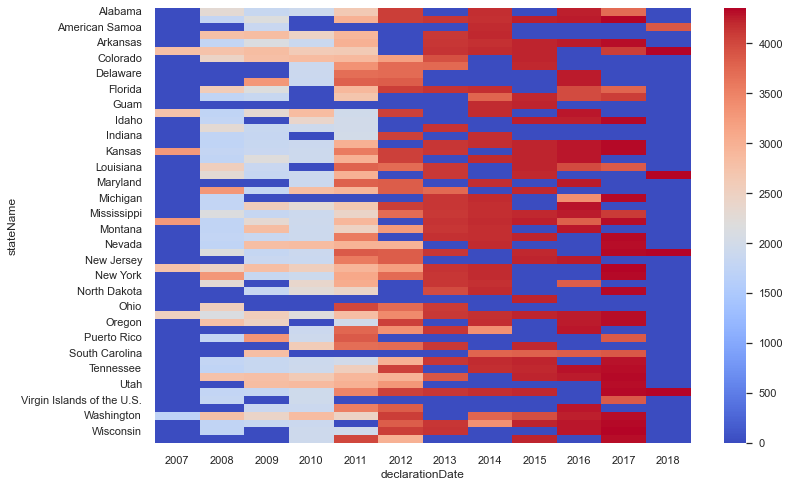

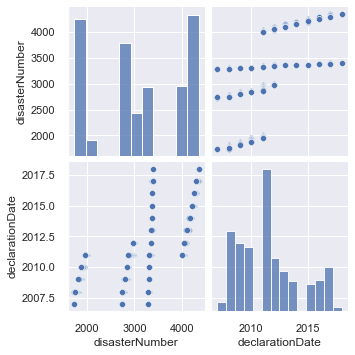

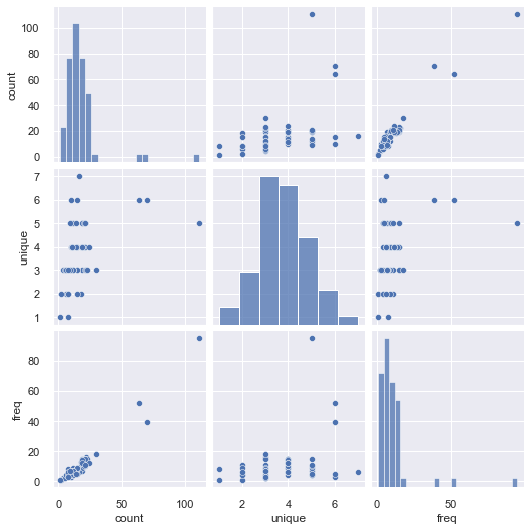

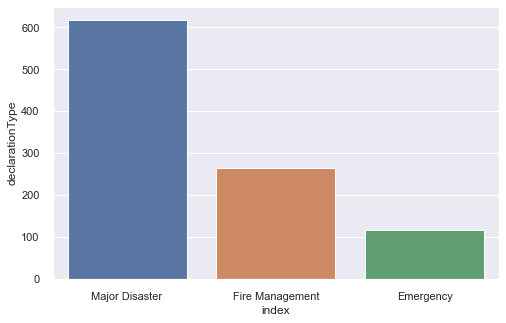

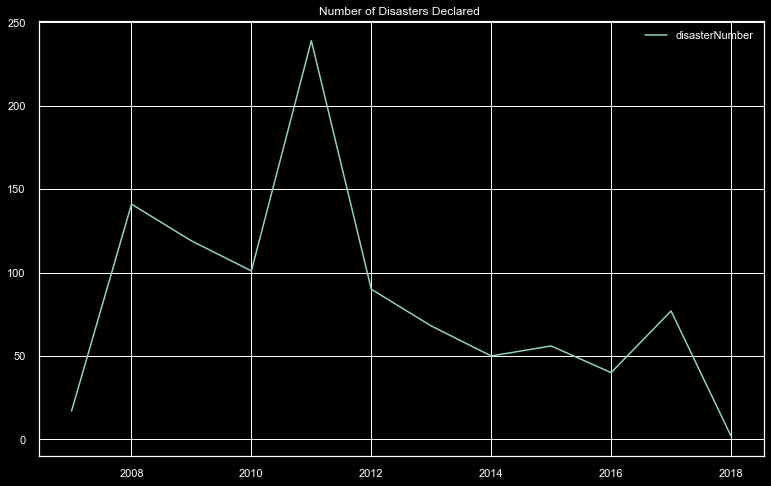

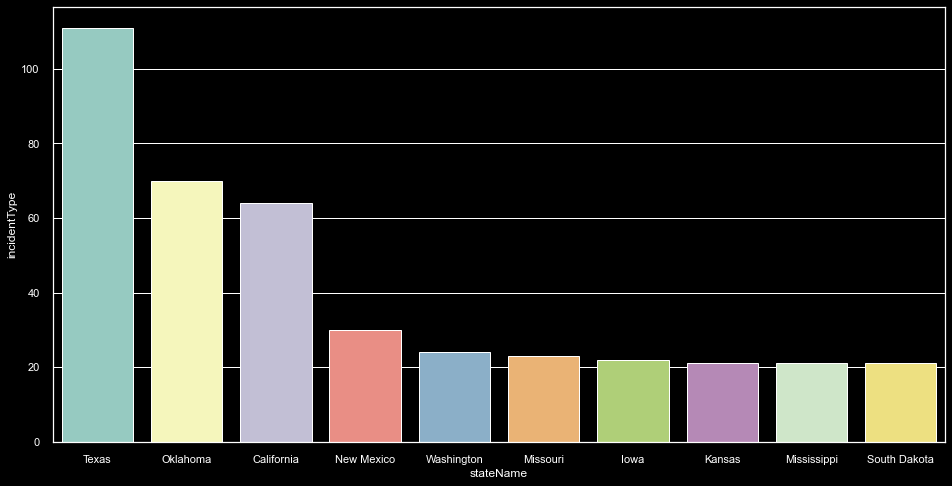

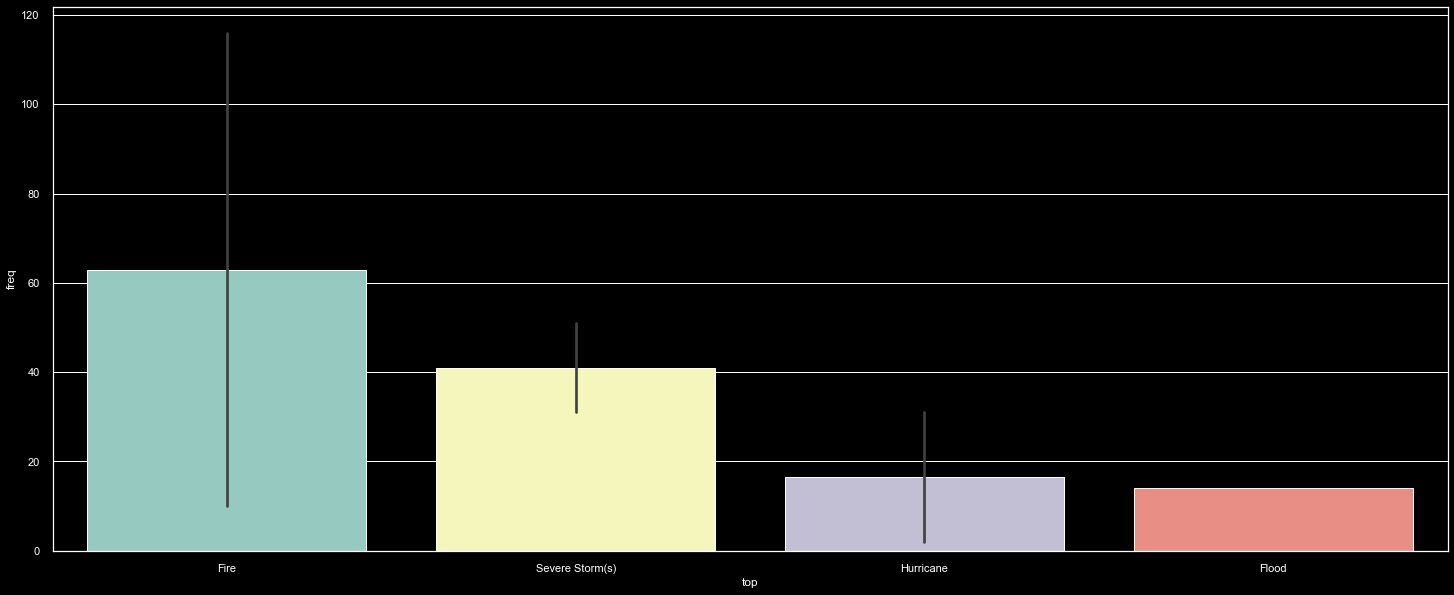

('5aa2d570cb4f0f7020b17042', 4332, 'TX   ', 'Major Disaster', 'Texas', 'Hurricane', 2017)
('5aa2d570cb4f0f7020b1708a', 4269, 'TX   ', 'Major Disaster', 'Texas', 'Flood', 2016)
('5aa2d570cb4f0f7020b17098', 4272, 'TX   ', 'Major Disaster', 'Texas', 'Flood', 2016)
('5aa2d570cb4f0f7020b1709e', 4245, 'TX   ', 'Major Disaster', 'Texas', 'Severe Storm(s)', 2015)
('5aa2d570cb4f0f7020b170a7', 4266, 'TX   ', 'Major Disaster', 'Texas', 'Flood', 2016)
('5aa2d570cb4f0f7020b170c7', 4255, 'TX   ', 'Major Disaster', 'Texas', 'Severe Storm(s)', 2016)
('5aa2d571cb4f0f7020b17106', 4223, 'TX   ', 'Major Disaster', 'Texas', 'Severe Storm(s)', 2015)
('5aa2d571cb4f0f7020b17126', 3363, 'TX   ', 'Emergency', 'Texas', 'Other', 2013)
('5aa2d571cb4f0f7020b1712b', 4136, 'TX   ', 'Major Disaster', 'Texas', 'Other', 2013)
('5aa2d571cb4f0f7020b17140', 4159, 'TX   ', 'Major Disaster', 'Texas', 'Severe Storm(s)', 2013)
('5aa2d572cb4f0f7020b171b4', 4029, 'TX   ', 'Major Disaster', 'Texas', 'Fire', 2011)
('5aa2d572cb4f0f

In [273]:
%run ./US_Disaster_Events.ipynb

In [ ]:
%run ./Natural Disasters Analysis.ipynb

In [ ]:
%run ./Earthquake.ipynb

# Integrating datasets in Azure SQL Server

In [238]:
#Integrating following 5 tables and creating Master_Disaster_Events
# [dbo].[country]
# [dbo].[Death_Toll_by_Disaster]
# [dbo].[RISK_COUNTRY]
# [dbo].[US_Disaster_Events]
# [dbo].[Natural_Disaster_Events]

In [239]:
Master_Disaster_sql = "SELECT DisasterYear,Country_code,Country_Name,Latitude,Longitude,DisasterType,TotalDeaths FROM Natural_Disaster_Events UNION ALL SELECT Year,Country_Code,Country_Name,Latitude,Longitude,Type,Death_Toll FROM Death_Toll_by_Disaster"
df_Master_Disaster_sql = pd.read_sql(Master_Disaster_sql, conn)

In [240]:
cursor.execute('''
IF OBJECT_ID('dbo.Master_Disaster_Event', 'U') IS NOT NULL 
  DROP TABLE dbo.Master_Disaster_Event; 
''')

In [241]:
cursor.execute('''
CREATE TABLE dbo.Master_Disaster_Event(
[Event_ID] [int] IDENTITY(1000,1) primary key,
[Year] [int] NULL,
[Country_Code] [char](3) NULL,
[Country_Name] [varchar](100) NULL,
[Latitude] [float] NULL,
[Longitude] [float] NULL,
[Type] [varchar](50) NULL,
[Death_Toll] [int] NULL,
[Severity] [varchar](30) NULL)
''')

In [242]:
df_Master_Disaster_sql.head(1)

DisasterYear Country_code Country_Name  Latitude   Longitude DisasterType  \
0          1966          TKL      Tokelau -8.967363 -171.855881        Storm   

   TotalDeaths  
0           20

In [243]:
#Inserting dataframe data into dbo.Master_Disaster_Event table
for index, row in df_Master_Disaster_sql.iterrows():
    cursor.execute("INSERT INTO dbo.Master_Disaster_Event(Year,Country_Code,Country_Name,Latitude,Longitude,Type,Death_Toll) values(?,?,?,?,?,?,?)",row.DisasterYear,row.Country_code, row.Country_Name,row.Latitude,row.Longitude,row.DisasterType,row.TotalDeaths)
    conn.commit()

In [244]:
cursor.execute('''
MERGE dbo.Master_Disaster_Event AS TARGET
USING dbo.RISK_COUNTRY AS SOURCE
ON(TARGET.Country_code = SOURCE.Country_Code)
WHEN MATCHED 
THEN UPDATE SET 
TARGET.Severity = SOURCE.Risk_Category;
''')
conn.commit()

In [245]:
Master_Disaster_Event_sql = "SELECT * FROM dbo.Master_Disaster_Event"
df_Master_Disaster_Event_sql = pd.read_sql(Master_Disaster_Event_sql, conn)

In [246]:
cursor.close()

In [247]:
df_Master_Disaster_Event_sql

Event_ID  Year Country_Code  Country_Name   Latitude   Longitude  \
0         1000  1966          TKL       Tokelau  -8.967363 -171.855881   
1         1001  2014          CHN         China  35.861660  104.195397   
2         1002  2010          CHN         China  35.861660  104.195397   
3         1003  1999          SDN         Sudan  12.862807   30.217636   
4         1004  1909          CHN         China  35.861660  104.195397   
...        ...   ...          ...           ...        ...         ...   
1653      2653  2019          NPL         Nepal  28.394857   84.124008   
1654      2654  2020          IND         India  20.593684   78.962880   
1655      2655  2020          BGD    Bangladesh  23.684994   90.356331   
1656      2656  2021          HTI         Haiti  18.971187  -72.285215   
1657      2657  2022          ZAF  South Africa -30.559482   22.937506   

            Type  Death_Toll        Severity  
0          Storm          20            None  
1          Storm          20     Medium Risk  
2     Earthquake          20     Medium Risk  
3       Epidemic         102       High Risk  
4     Earthquake          21     Medium Risk  
...          ...         ...             ...  
1653       Flood        1600     Medium Risk  
1654       Flood        1922     Medium Risk  
1655       Flood        1922  Very High Risk  
1656  Earthquake        2248  Very High Risk  
1657       Flood         450     Medium Risk  

[1658 rows x 9 columns]

In [249]:
df=df_Master_Disaster_Event_sql

# Visualizations on Master_Disaster_Event table

                       Type
Flood                   540
Storm                   422
Earthquake              200
Epidemic                149
Landslide                76
Drought                  63
Tropical cyclone         59
Extreme temperature      47
Wildfire                 43
Volcanic activity        20
Heat wave                12
Insect infestation        9
Tsunami                   8
Mass movement (dry)       6
Fog                       1
Glacial lake outburst     1
Volcanic eruption         1
Limnic eruption           1


<AxesSubplot:>

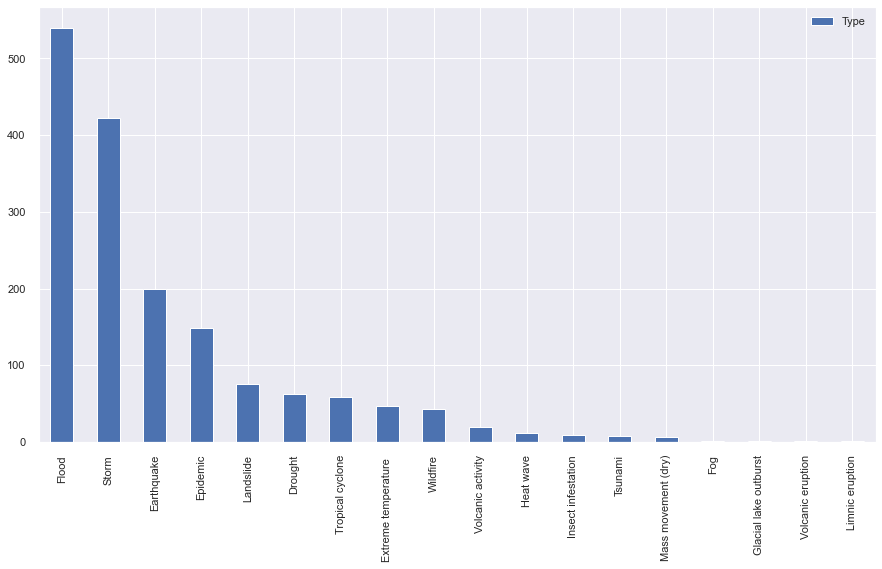

In [250]:
Disaster_type= df['Type'].value_counts()
df1 = pd.DataFrame([Disaster_type]).T
print (df1)
df1.plot(kind='bar',stacked=True, figsize=(15,8))

## Above Figure shows Flood is the most prominent Disaster

In [251]:
# Top Countries with maximum risk
p = df[['Country_Name','Type']].groupby('Country_Name').count()
p.reset_index(inplace=True)
p=p.sort_values(by='Type',ascending=False).head(10)
p

Country_Name  Type
35           China   112
177  United States   101
76           India    93
77       Indonesia    69
129    Philippines    67
13      Bangladesh    45
83           Japan    38
78            Iran    31
104         Mexico    25
124       Pakistan    24

In [252]:
fig = px.histogram(df, x="Country_Name", y="Year", color="Country_Name", marginal="rug",
                   hover_data=df.columns)
fig.show()

## Above fig shows that China Followed by United States , India , Indonesia and Phillipines are the top 5 countries effected by disasters

In [253]:
fig = px.histogram(df, x="Year", y="Death_Toll", color="Type", marginal="rug",
                   hover_data=df.columns)
fig.show()

## Above Figure Shows 1930 - 1934 is the worst years in terms of death rate.

In [254]:
fig = px.bar(df, x='Year', y='Death_Toll')
fig.show()

## Above fig shows that in 1931 there is arount 4 millions death count so digging more about what has happened in 1931.

In [255]:
#bar charts
import plotly.graph_objects as go  

colors = ['lightslategray',] * 20  
colors[0] = 'crimson'

data_1931 = df.query("Year == 1931")


xvar = list(data_1931.head(30)['Country_Name'])
yvar = list(data_1931.head(30)['Type']) 

fig = go.Figure(data=[go.Bar(x=xvar,  y=yvar, marker_color=colors )])

fig.update_layout(title_text='Type of disaster happened in 1931')

### Above Figure shows that China's Flood , China's Earthquake and vocanic activity in Indonesia has caused huge loss of life in 1931
### Exploring more about china, United State , INDIA, Indonesia, Philippines as these three are the top 5 countries most effected by disaster over time

# China

In [256]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="China"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="China"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='China disaster observation')


fig.show()

In [257]:
# To show which years are worst years in CHINA from disaster perspective
import plotly.express as px
df1 = df.query('Country_Name=="China"')
fig = px.histogram(df1, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df1.columns)
fig.update_layout(title='Number of Disasters happened in China over the period of time')
fig.show()

### Above Figures shows that China has mostly effected by Storm. 1931 is the worst year in China from disaster perspective when lot of deaths were reported due to flood.

# United States

In [258]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="United States"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="United States"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='United States disaster observation')


fig.show()

In [259]:
# To show which years are worst years in United States from disaster perspective
import plotly.express as px
df2 = df.query('Country_Name=="United States"')
fig = px.histogram(df2, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df.columns)
fig.update_layout(title='Number of Disasters happened in United States over the period of time')
fig.show()

### Above Figures shows that United Staes has mostly effected by Storm. 1936 is the worst year in United States from disaster perspective when lot of deaths were reported due to heat wave.

# India

In [260]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="India"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="India"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='India disaster observation')


fig.show()

In [261]:
# To show which years are worst years in India from disaster perspective
import plotly.express as px
df3 = df.query('Country_Name=="India"')
fig = px.histogram(df3, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df3.columns)
fig.update_layout(title='Number of Disasters happened in India over the period of time')
fig.show()

### Above Figures shows that India has mostly effected by Flood. 1970 is the worst year in India from disaster perspective when lot of deaths were reported due to Tropical Cyclone.

# Indonesia

In [262]:
import plotly.graph_objects as go 
values =df.query('Country_Name=="Indonesia"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="Indonesia"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='Indonesia disaster observation')


fig.show()

In [263]:
# To show which years are worst years in Indonesia from disaster perspective
import plotly.express as px
df4 = df.query('Country_Name=="Indonesia"')
fig = px.histogram(df4, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df4.columns)
fig.update_layout(title='Number of Disasters happened in Indonesia over the period of time')
fig.show()

### Above Figures shows that Indonesia has mostly effected by Earthquake. 2004 is the worst year in Indonesia from disaster perspective when lot of deaths were reported due to Tsunami.

# Philippines

In [264]:

import plotly.graph_objects as go 
values =df.query('Country_Name=="Philippines"')['Death_Toll'].value_counts()
m=df.query('Country_Name=="Philippines"')['Type']
fig = go.Figure(data=[go.Pie(labels=m, values=values)])
fig.update_layout(title='Philippines disaster observation')


fig.show()

In [265]:
# To show which years are worst years in Philippines from disaster perspective
import plotly.express as px
df5 = df.query('Country_Name=="Philippines"')
fig = px.histogram(df5, x="Year", y="Death_Toll", color="Year", marginal="rug",
                   hover_data=df5.columns)
fig.update_layout(title='Number of Disasters happened in Philippines over the period of time')
fig.show()

### Above Figures shows that Philippines has mostly effected by Storm. 1922 is the worst year in Philippines from disaster perspective when lot of deaths were reported due to Tropical Cyclone.